In [123]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import chisquare, chi2_contingency
import math

with open (r'/Users/suyashgoel/Downloads/bank+marketing/bank/bank-full.csv', 'r') as f:
    lines = f.readlines()
    data = [line.strip().split(';') for line in lines]

df = pd.DataFrame(data[1:], columns= data[0]).map(lambda x : x.replace('"', '') if isinstance (x, str) else x)

df.columns = [column.strip('"') for column in df.columns]

In [124]:
#converting numeric data

df['age'] = df['age'].astype(int)
df['balance'] = df['balance'].astype(int)
df['day'] = df['day'].astype(int)
df['duration'] = df['duration'].astype(int)
df['campaign'] = df['campaign'].astype(int)
df['pdays'] = df['pdays'].astype(int)
df['previous'] = df['previous'].astype(int)

(array([1.760e+02, 1.160e+03, 3.937e+03, 7.810e+03, 7.326e+03, 5.599e+03,
        3.539e+03, 4.476e+03, 3.780e+03, 3.286e+03, 2.934e+03, 3.780e+02,
        2.120e+02, 1.650e+02, 1.720e+02, 1.310e+02, 8.900e+01, 2.700e+01,
        7.000e+00, 7.000e+00]),
 array([18.  , 21.85, 25.7 , 29.55, 33.4 , 37.25, 41.1 , 44.95, 48.8 ,
        52.65, 56.5 , 60.35, 64.2 , 68.05, 71.9 , 75.75, 79.6 , 83.45,
        87.3 , 91.15, 95.  ]),
 <BarContainer object of 20 artists>)

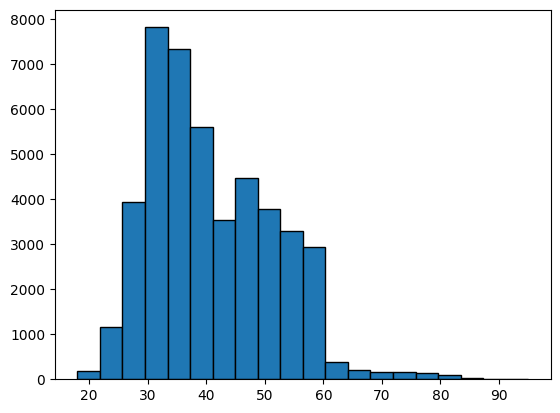

In [125]:
#numeric data visualization

plt.hist(df['age'], bins= 20, edgecolor= 'k', alpha = 1.0)

(array([3.9587e+04, 5.2330e+03, 2.9400e+02, 5.8000e+01, 2.1000e+01,
        7.0000e+00, 6.0000e+00, 1.0000e+00, 2.0000e+00, 2.0000e+00]),
 array([ -8019. ,   2995.6,  14010.2,  25024.8,  36039.4,  47054. ,
         58068.6,  69083.2,  80097.8,  91112.4, 102127. ]),
 <BarContainer object of 10 artists>)

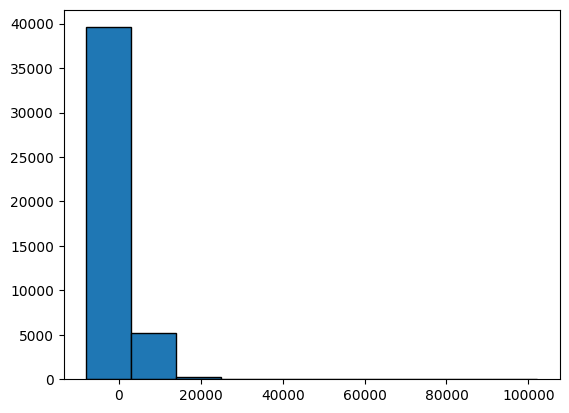

In [126]:
plt.hist(df['balance'], bins= 10, edgecolor= 'k', alpha = 1.0)

(array([1615., 1079., 3355., 1932., 3659., 1561., 2003., 1603., 3433.,
        1703., 3354., 2308., 4509., 2026., 1844.,  447., 1875., 1121.,
        3575., 2209.]),
 array([ 1. ,  2.5,  4. ,  5.5,  7. ,  8.5, 10. , 11.5, 13. , 14.5, 16. ,
        17.5, 19. , 20.5, 22. , 23.5, 25. , 26.5, 28. , 29.5, 31. ]),
 <BarContainer object of 20 artists>)

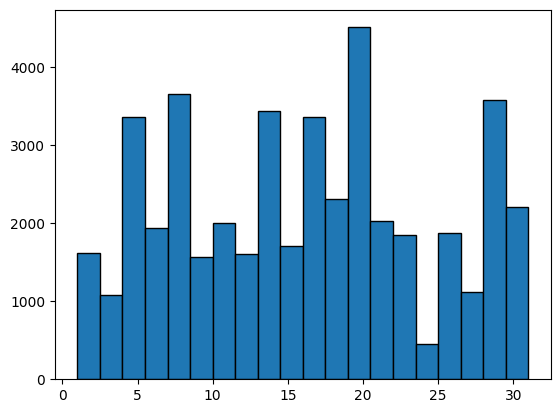

In [127]:
plt.hist(df['day'], bins= 20, edgecolor= 'k', alpha = 1.0)

(array([3.9677e+04, 4.4250e+03, 8.6500e+02, 1.7600e+02, 4.3000e+01,
        1.1000e+01, 1.1000e+01, 2.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([   0. ,  491.8,  983.6, 1475.4, 1967.2, 2459. , 2950.8, 3442.6,
        3934.4, 4426.2, 4918. ]),
 <BarContainer object of 10 artists>)

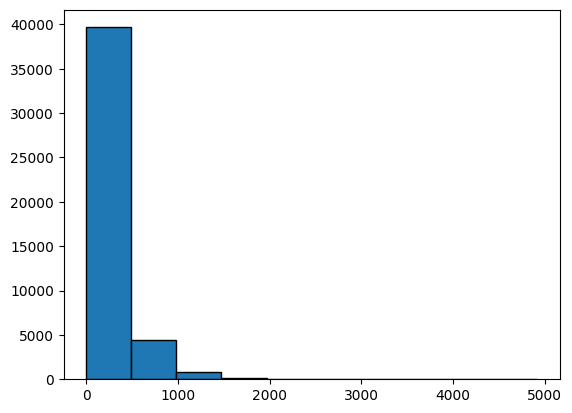

In [128]:
plt.hist(df['duration'], bins= 10, edgecolor= 'k', alpha = 1.0)

(array([4.2882e+04, 1.6220e+03, 4.2000e+02, 1.6500e+02, 7.5000e+01,
        3.3000e+01, 7.0000e+00, 3.0000e+00, 2.0000e+00, 2.0000e+00]),
 array([ 1. ,  7.2, 13.4, 19.6, 25.8, 32. , 38.2, 44.4, 50.6, 56.8, 63. ]),
 <BarContainer object of 10 artists>)

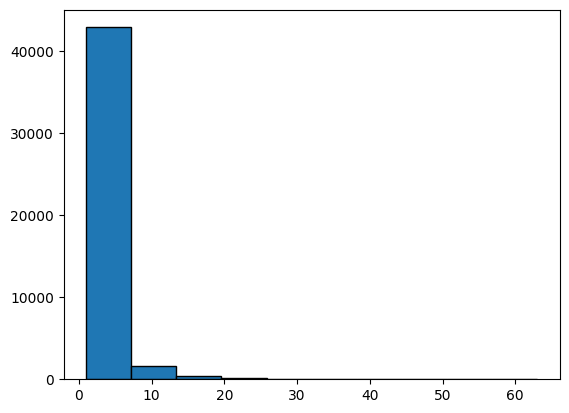

In [129]:
plt.hist(df['campaign'], bins= 10, edgecolor= 'k', alpha = 1.0)

(array([3.7516e+04, 2.2990e+03, 2.1540e+03, 1.8250e+03, 1.2290e+03,
        9.8000e+01, 3.9000e+01, 1.8000e+01, 1.8000e+01, 1.5000e+01]),
 array([ -1. ,  86.2, 173.4, 260.6, 347.8, 435. , 522.2, 609.4, 696.6,
        783.8, 871. ]),
 <BarContainer object of 10 artists>)

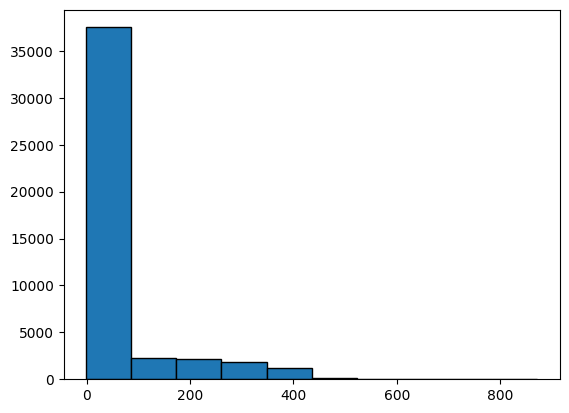

In [130]:
plt.hist(df['pdays'], bins= 10, edgecolor= 'k', alpha = 1.0)

(array([4.5208e+04, 2.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([  0.,  55., 110., 165., 220., 275.]),
 <BarContainer object of 5 artists>)

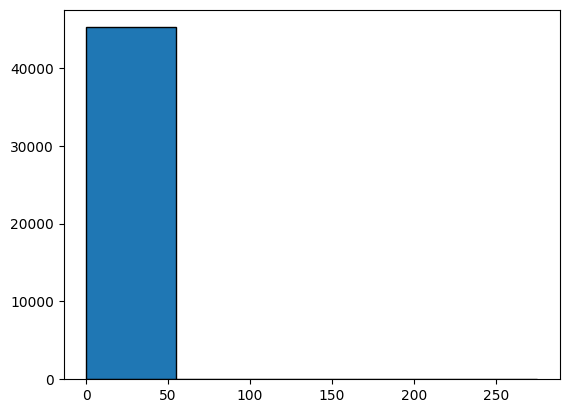

In [131]:
plt.hist(df['previous'], bins= 5, edgecolor= 'k', alpha = 1.0)

In [132]:
print(df.columns)

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')


<Axes: xlabel='count', ylabel='marital'>

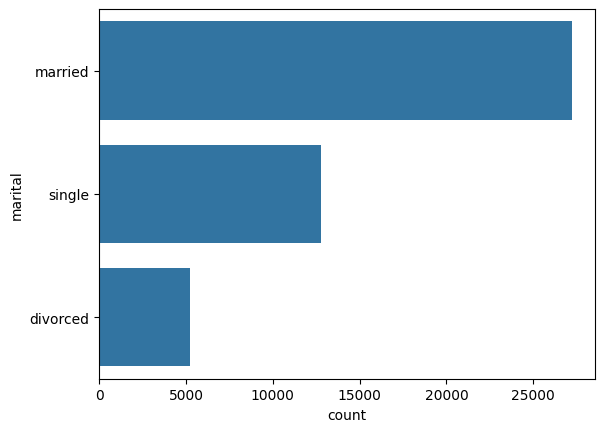

In [133]:
#categorical data visualization

sns.countplot(df['marital'])

<Axes: xlabel='count', ylabel='education'>

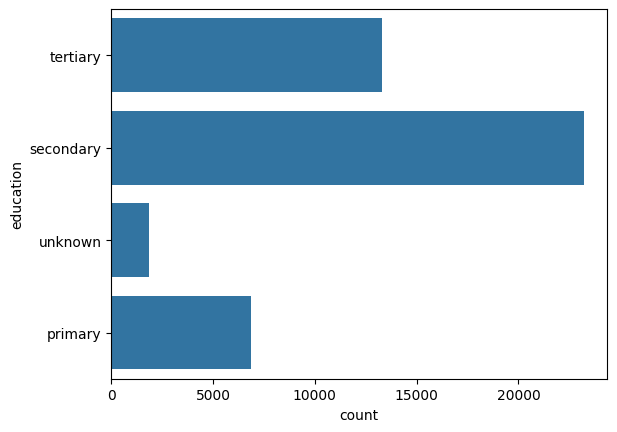

In [134]:
sns.countplot(df['education'])

<Axes: xlabel='count', ylabel='default'>

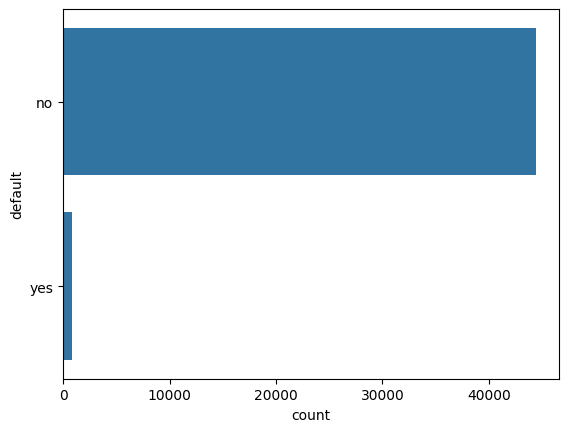

In [135]:
sns.countplot(df['default'])

In [136]:
from sklearn.utils import resample

df_majority = df[(df['default']=='no')]
df_minority = df[(df['default']=='yes')]

print(df['default'].value_counts())

df_minority_upsampled = resample(df_minority, replace=True, n_samples= 44396, random_state=1)

df_default_upsampled = pd.concat([df_majority,  df_minority_upsampled])

default
no     44396
yes      815
Name: count, dtype: int64


<Axes: xlabel='count', ylabel='default'>

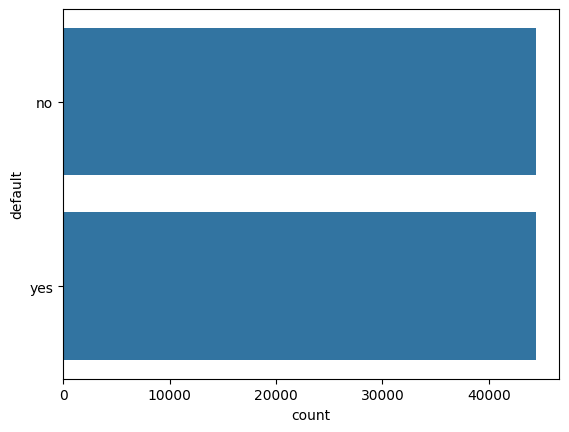

In [137]:
df = df.drop(['default'], axis=1)
df = pd.concat([df, df_default_upsampled])

sns.countplot(df['default'])

<Axes: xlabel='count', ylabel='housing'>

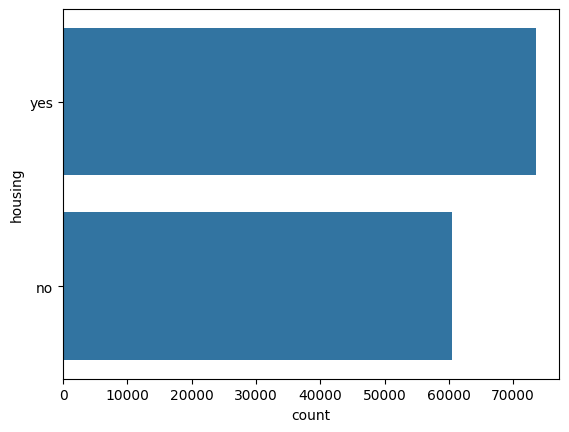

In [138]:
sns.countplot(df['housing'])

<Axes: xlabel='count', ylabel='loan'>

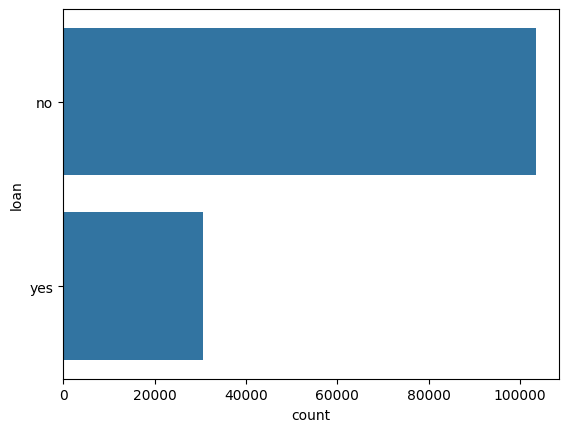

In [139]:
sns.countplot(df['loan'])

<Axes: xlabel='count', ylabel='contact'>

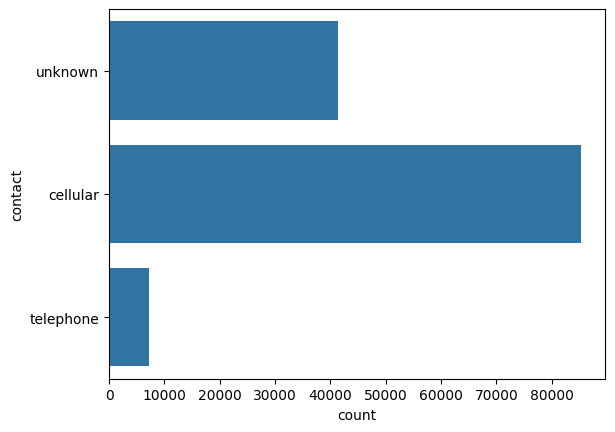

In [140]:
sns.countplot(df['contact'])

<Axes: xlabel='count', ylabel='month'>

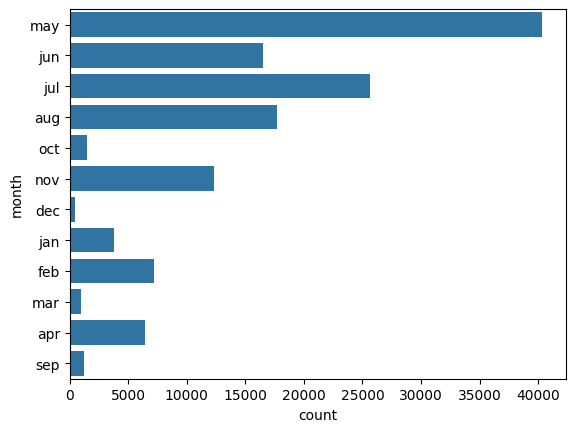

In [141]:
sns.countplot(df['month'])

<Axes: >

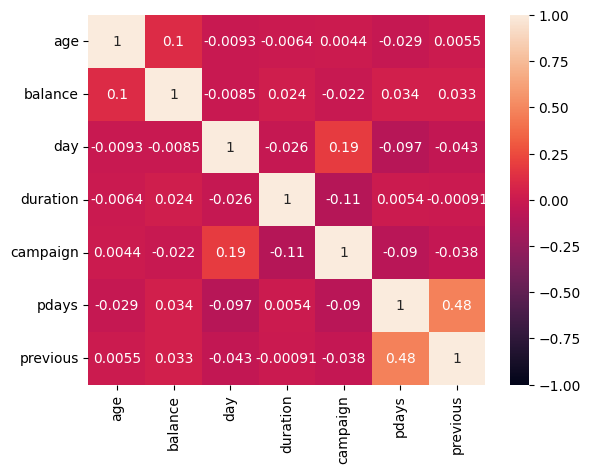

In [142]:
sns.heatmap(df.select_dtypes(include=['int']).corr(), vmin = -1, vmax = 1, annot= True)

In [143]:
# drop heavily correlated numeric variables

df = df.drop(['pdays'], axis = 1)

<Axes: >

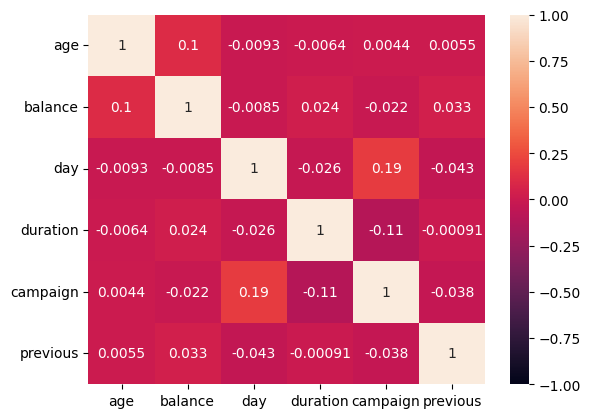

In [144]:
sns.heatmap(df.select_dtypes(include=['int']).corr(), vmin = -1, vmax = 1, annot= True)

In [145]:
#cramers v for categorical variables

def cramers(df):
    num_cols = df.shape[1]
    cramer_matrix = np.zeros((num_cols, num_cols))
    for cat1 in range(num_cols):
        for cat2 in range(num_cols):
            ct = pd.crosstab(df[df.columns[cat1]], df[df.columns[cat2]])
            c, p, dof, expected = chi2_contingency(ct) 
            n = sum(np.sum(ct))
            k = min(ct.shape)
            cramer_matrix[cat1, cat2] = math.sqrt(c / (n * k))
    cramer_matrix = pd.DataFrame(cramer_matrix, columns=df.columns, index=df.columns)
    return cramer_matrix

<Axes: >

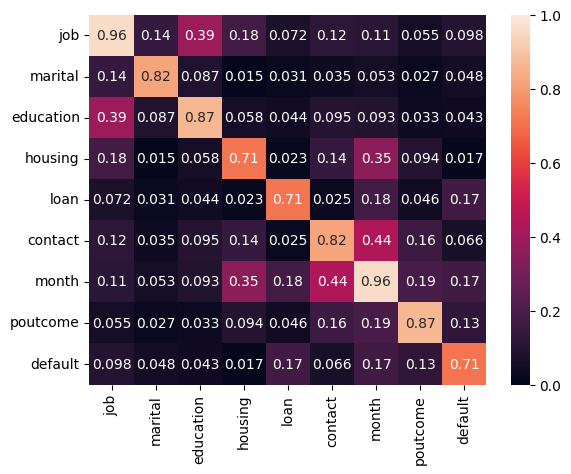

In [146]:
cat_var = df.select_dtypes('object')
cat_var.drop(columns=['y'], inplace=True)

sns.heatmap(cramers(cat_var), vmin = 0, vmax = 1, annot= True)

In [147]:
# drop heavily correlated categorical variables

df = df.drop(['education'], axis = 1)
df = df.drop(['month'], axis = 1)

<Axes: xlabel='count', ylabel='default'>

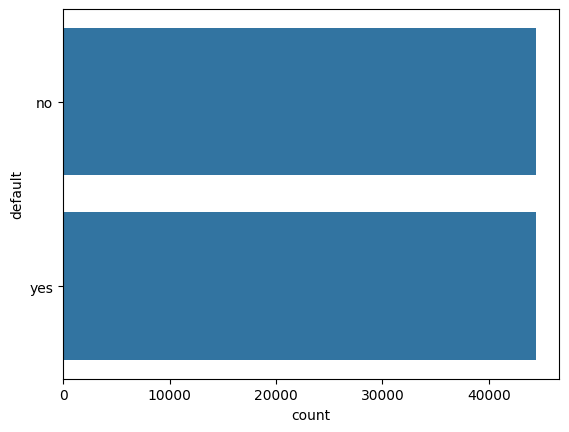

In [148]:
cat_var = df.select_dtypes('object')
cat_var.drop(columns=['y'], inplace=True)

sns.countplot(cat_var['default'])

In [149]:
#one hot encoding

dummy_features = pd.get_dummies(cat_var, drop_first=True)
print(dummy_features.columns)

Index(['job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_married', 'marital_single', 'housing_yes', 'loan_yes',
       'contact_telephone', 'contact_unknown', 'poutcome_other',
       'poutcome_success', 'poutcome_unknown', 'default_yes'],
      dtype='object')


In [150]:
#dataframe updated with one hot encoded variables


df = pd.concat([df, dummy_features], axis = 1)
df.drop(cat_var, axis= 1, inplace= True)


In [151]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

import warnings
warnings.filterwarnings("ignore")

In [152]:
#split into testing and training data; train model; compute accuracy

X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=['y']), df['y'], test_size=0.8)

logisticReg = LogisticRegression(solver='newton-cg', max_iter=1000)
logisticReg.fit(X_train, y_train)

prediction = logisticReg.predict(X_test)
accuracy = logisticReg.score(X_test, y_test)
print(accuracy)


0.9130901187466769


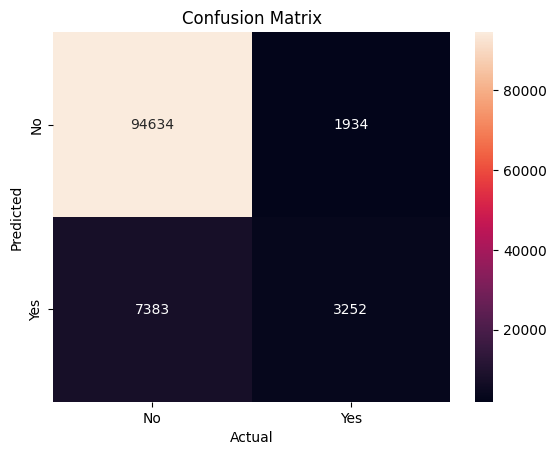

In [153]:
cm = confusion_matrix(y_test,prediction)
cm = pd.DataFrame(cm, index=['No', 'Yes'], columns=['No', 'Yes'])

sns.heatmap(cm, annot=True, fmt='g')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title('Confusion Matrix')
plt.show()